Data Frame: 
   x1  x2   y
0   4   1   2
1   2   8 -14
2   1   0   1
3   3   2  -1
4   1   4  -7
5   6   7  -8

 Tuned parameters per each batch


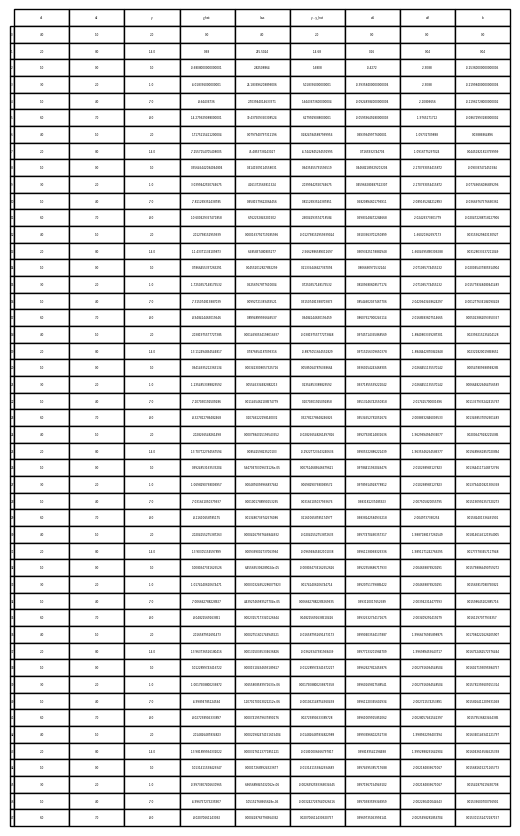

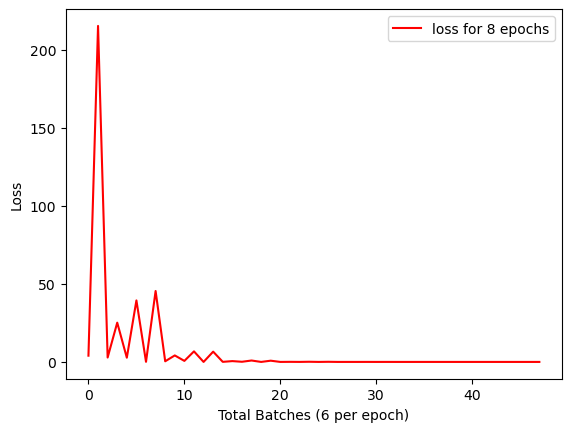

In [7]:
# Activity-Stochastic Gradient Descent 
# Create the log table containing these columns and fill out the table for 1 epoch for the dataset provided in the example below:
# https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843

import pandas as pd
# creating a dataframe for the dataset
d = {'x1': [4, 2, 1,3,1,6], 'x2': [1, 8,0, 2,4,7], 'y': [2, -14, 1, -1, -7, -8]}
df = pd.DataFrame(data=d)
print ("Data Frame: ")
print(df)

# batch size =1, so we have 6 batches altogether. 
# We complete 1 epoch when the model has iterated through all the batches once.
 
# we are reporting : x1, x2, y, y_hat, (y- y_hat), w1, w2, b  ... assuming y_hat = w1x1 + w2x2 + b
# goal: find the best w (weight) and b (bias) values using Stochastic GD. 

# Initializing the weights 
w_1 = 0.0
w_2 = 0.0
b=0 
a = 0.01  # learning rate
data= []

# Make sure we tune up to 8 epochs to get a good feel for when loss function stabilizes
for epoch in range(0,8):
    # Batch size = 1 , so we have 6 batches in 1 epoch: 
    for i in range(0, 6):  # the size of dataset is 6 (6 samples)
        x_1 = df.loc[i][0]
        x_2 = df.loc[i][1]
        y = df.loc[i][2]
        y_hat = (w_1*x_1) + (w_2*x_2) + b
        loss = pow((y - y_hat) , 2)
    
        data.append([x_1, x_2, y, y_hat, loss, (y - y_hat) ,w_1,w_2,b])
    
        # updated parameters
        w_1 = w_1 + a*(2* (y - y_hat) *x_1)
        w_2 = w_2 + a*(2*(y - y_hat)*x_2)
        b = b + a*(2* (y - y_hat)*1)
        # end of the ith batch
    
output = pd.DataFrame(data, columns=['x1', 'x2', 'y', 'y_hat', 'loss' , 'y - y_hat' , 'w1', 'w2' , 'b'])

import matplotlib.pyplot as plt

# Tabulate the output of all the batches, include weights, biases, loss, actual - predicted, et cetera
fix, ax = plt.subplots()
ax.axis('off')
table = pd.plotting.table(ax, output, loc='center', cellLoc='center')

# Print out the adjusting loss as a function over total batches 
print('\n Tuned parameters per each batch')
plt.figure(2)
plt.xlabel('Total Batches (6 per epoch)')
plt.ylabel('Loss')
plt.plot(output['loss'],'r-',label='loss for '+ str(epoch + 1) + ' epochs') 
plt.legend()
plt.show()


